# ERP peak analysis

Extract the study-relevant ERP peak subjectwise (e.g. one value per subject) and statistically test them. 
* Example RQ: On which ERP-peaks do we find major difference between the conditions?

In [1]:
# general purpose
import numpy as np
import pandas as pd

# i/O
from scipy import io
from pathlib import Path
import datetime
import traceback
import logging
import pickle
import pkg_resources

# plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# testing
import unittest

# EEG stuff
import mne
import osfclient 
import mne_bids 
from mne_bids import (BIDSPath, read_raw_bids)

# EEG utils 
import ccs_eeg_utils
import ccs_eeg_semesterproject

import configuration

In [3]:
# mne.set_log_level('WARNING')

## getting ERPs

P3: The task for the participants was to press the letters A,B,C,D,E when the corresponding letter was shown as a stimupli randomly with $p = 0.2$. One letter was designated the target for a given block of trials, and the other 4 letters were non-targets. Thus, the probability of the target category was $0.2$, but the same physical stimulus served as a target in some blocks and a nontarget in others. Participants responded whether the letter presented on each trial was the target or a non-target for that block. There were 34 participants.

We can cross-check the results with the published results:
- time window of stat. significant difference: $253.91 - 664.06$
- recommended measurement window: $300 - 600$

Reading /home/work/Dokumente/Studium/SimTech_MSc/14. Semester/Signal_Processing_and_Analysis_of_Human_Brain_Potentials_EEG/Ostertag_SS2022_EEGSemesterProject/Data/p3/sub-003/ses-P3/eeg/sub-003_ses-P3_task-P3_eeg.fdt
Reading events from Data/p3/sub-003/ses-P3/eeg/sub-003_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response

/tmp/ipykernel_785644/2671187803.py:38: RuntimeWarning: Data file name in EEG.data (sub-003_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-003_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)


    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
The event "stimulus" refers to multiple event values. Creating hierarchical event names.
    Renaming event: stimulus -> stimulus/32
    Renaming

/tmp/ipykernel_785644/2671187803.py:38: RuntimeWarning: Participants file not found for sub-003_ses-P3_task-P3_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 77 samples (0.301 sec)

Data/p3/sub-003/ses-P3/eeg/sub-003_ses-P3_task-P3_
Applying ICA to Raw instance
    Transfor

/home/work/Dokumente/Studium/SimTech_MSc/14. Semester/Signal_Processing_and_Analysis_of_Human_Brain_Potentials_EEG/Ostertag_SS2022_EEGSemesterProject/ccs_eeg_semesterproject.py:64: UserWarning: loadtxt: Empty input file: "Data/p3/sub-003/ses-P3/eeg/sub-003_ses-P3_task-P3_badChannels.tsv"
  badChannels = np.loadtxt(fn+'badChannels.tsv',delimiter='\t')
/home/work/Dokumente/Studium/SimTech_MSc/14. Semester/Signal_Processing_and_Analysis_of_Human_Brain_Potentials_EEG/Ostertag_SS2022_EEGSemesterProject/ccs_eeg_semesterproject.py:96: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ica.ICA(method='imported_eeglab', n_components=n_components)


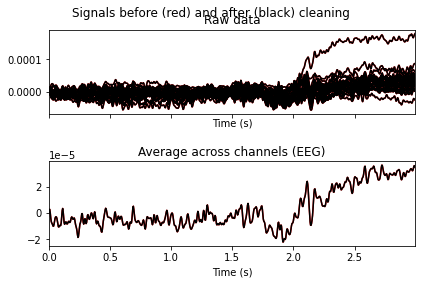

EEG channel type selected for re-referencing
Applying a custom EEG reference.
Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']
Not setting metadata
Not setting metadata
200 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 200 events and 257 original time points ...
0 bad epochs dropped
[(0, ('IGNORED',)), (1, ('IGNORED',)), (3, ('IGNORED',)), (5, ('IGNORED',)), (7, ('IGNORED',)), (9, ('IGNORED',)), (11, ('IGNORED',)), (13, ('IGNORED',)), (15, ('IGNORED',)), (17, ('IGNORED',)), (19, ('IGNORED'

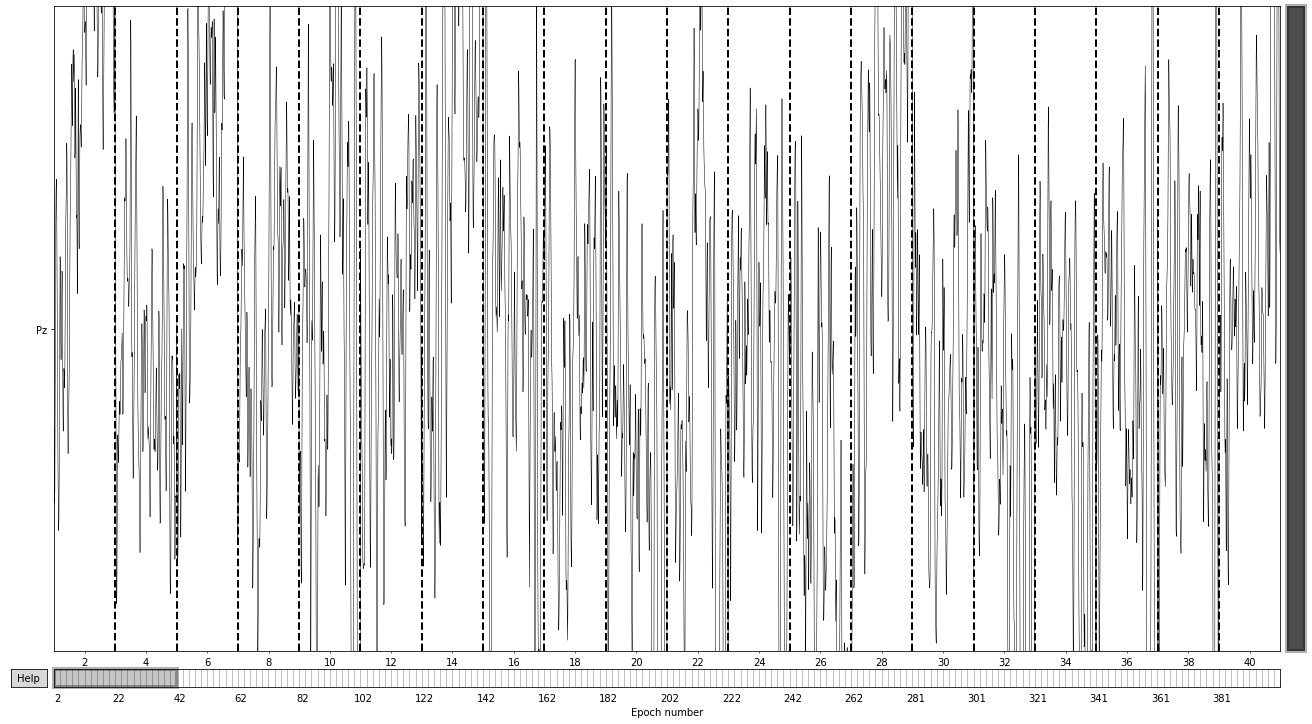

Not setting metadata
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


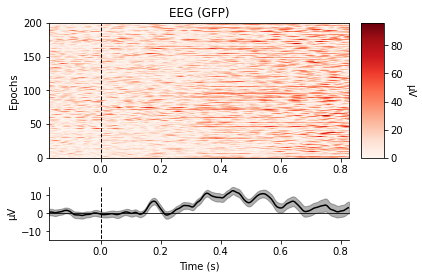

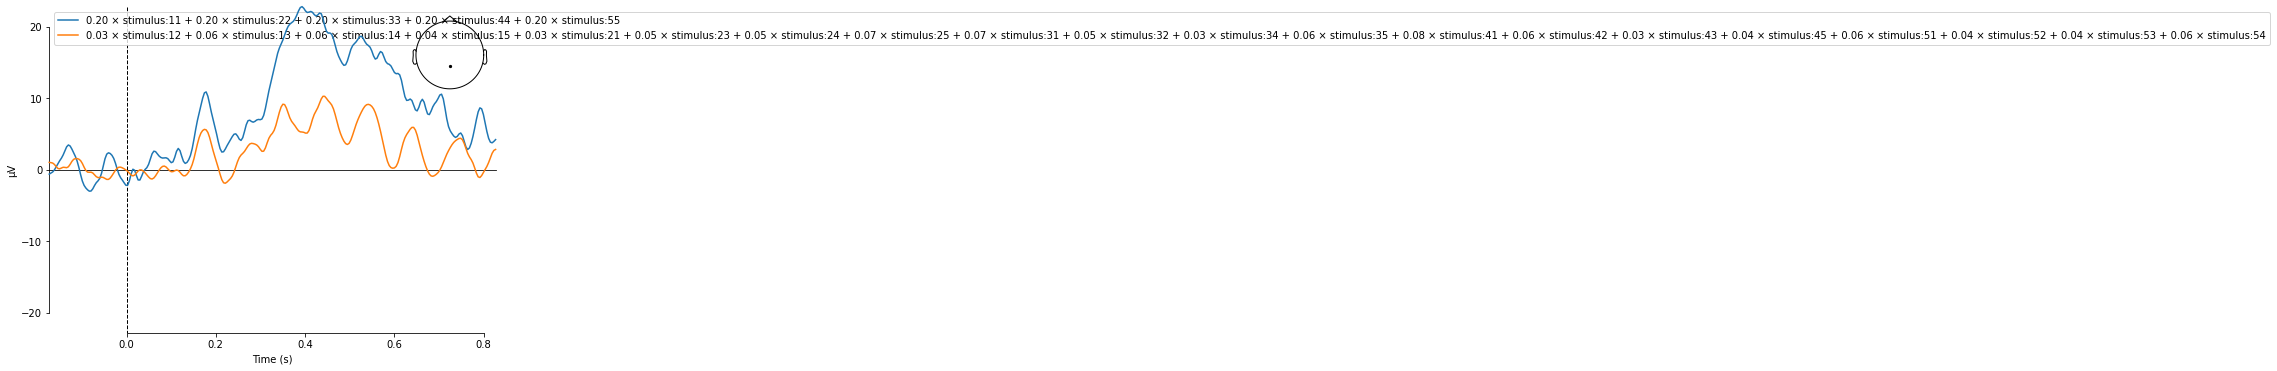

Reading /home/work/Dokumente/Studium/SimTech_MSc/14. Semester/Signal_Processing_and_Analysis_of_Human_Brain_Potentials_EEG/Ostertag_SS2022_EEGSemesterProject/Data/p3/sub-005/ses-P3/eeg/sub-005_ses-P3_task-P3_eeg.fdt
Reading events from Data/p3/sub-005/ses-P3/eeg/sub-005_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response

/tmp/ipykernel_785644/2671187803.py:38: RuntimeWarning: Data file name in EEG.data (sub-005_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-005_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)


    Renaming event: stimulus -> stimulus/51
    Renaming event: stimulus -> stimulus/53
    Renaming event: stimulus -> stimulus/51
    Renaming event: stimulus -> stimulus/52
    Renaming event: stimulus -> stimulus/52
    Renaming event: stimulus -> stimulus/51
    Renaming event: stimulus -> stimulus/55
    Renaming event: stimulus -> stimulus/55
    Renaming event: stimulus -> stimulus/54
    Renaming event: stimulus -> stimulus/53
    Renaming event: stimulus -> stimulus/54
    Renaming event: stimulus -> stimulus/52
    Renaming event: stimulus -> stimulus/52
    Renaming event: stimulus -> stimulus/55
    Renaming event: stimulus -> stimulus/51
    Renaming event: stimulus -> stimulus/52
    Renaming event: stimulus -> stimulus/53
    Renaming event: stimulus -> stimulus/51
    Renaming event: stimulus -> stimulus/54
    Renaming event: stimulus -> stimulus/52
    Renaming event: stimulus -> stimulus/54
    Renaming event: stimulus -> stimulus/52
    Renaming event: stimulus -> 

/tmp/ipykernel_785644/2671187803.py:38: RuntimeWarning: Participants file not found for sub-005_ses-P3_task-P3_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 77 samples (0.301 sec)

Data/p3/sub-005/ses-P3/eeg/sub-005_ses-P3_task-P3_
Applying ICA to Raw instance
    Transfor

/home/work/Dokumente/Studium/SimTech_MSc/14. Semester/Signal_Processing_and_Analysis_of_Human_Brain_Potentials_EEG/Ostertag_SS2022_EEGSemesterProject/ccs_eeg_semesterproject.py:64: UserWarning: loadtxt: Empty input file: "Data/p3/sub-005/ses-P3/eeg/sub-005_ses-P3_task-P3_badChannels.tsv"
  badChannels = np.loadtxt(fn+'badChannels.tsv',delimiter='\t')
/home/work/Dokumente/Studium/SimTech_MSc/14. Semester/Signal_Processing_and_Analysis_of_Human_Brain_Potentials_EEG/Ostertag_SS2022_EEGSemesterProject/ccs_eeg_semesterproject.py:96: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ica.ICA(method='imported_eeglab', n_components=n_components)


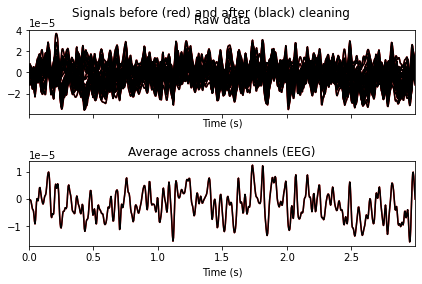

EEG channel type selected for re-referencing
Applying a custom EEG reference.
Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']
Not setting metadata
Not setting metadata
200 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 200 events and 257 original time points ...
0 bad epochs dropped
[(0, ('IGNORED',)), (2, ('IGNORED',)), (4, ('IGNORED',)), (6, ('IGNORED',)), (8, ('IGNORED',)), (10, ('IGNORED',)), (12, ('IGNORED',)), (14, ('IGNORED',)), (16, ('IGNORED',)), (18, ('IGNORED',)), (20, ('IGNORED

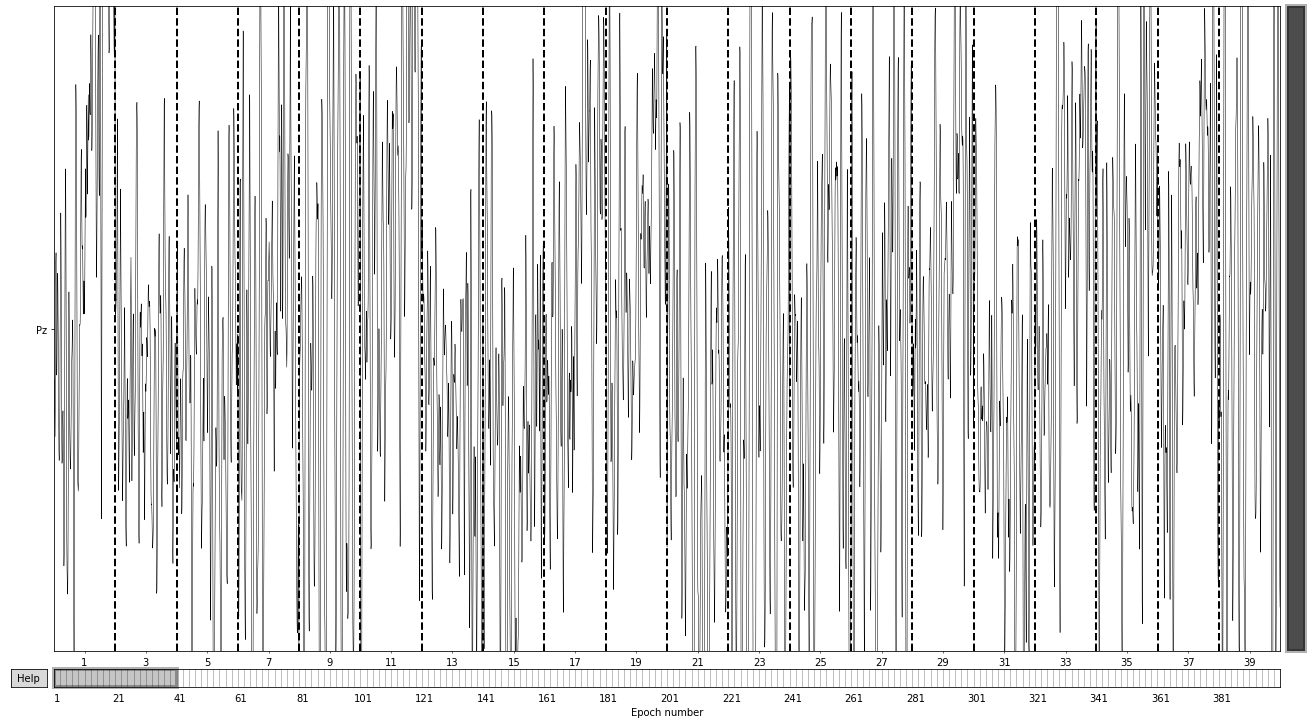

Not setting metadata
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


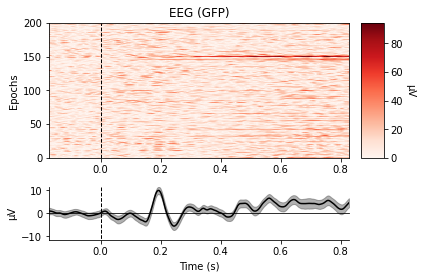

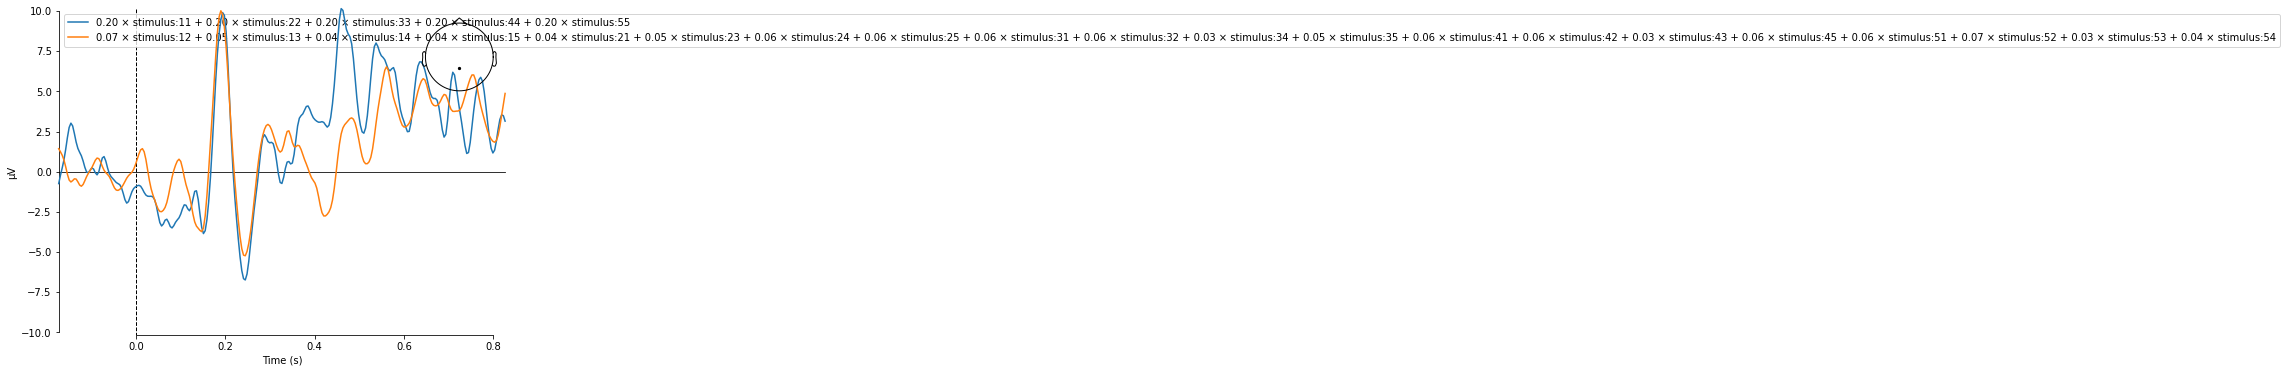

In [23]:
# subject_ids = [path.stem.replace('sub-', '') for path in Path(configuration.fname.bids_root).glob('sub-*')]

subject_ids = ['003', '005']

columns_evoked = ['subject_id', 
                  'no_trials', 'accuracy', # I can check this
                  'avg_peak_value_target', 'avg_peak_value_distractor',
                  'avg_peak_time_target', 'avg_peak_time_distractor', # I can use it to compare it to the literature
                  'target_evd_path', 'distractor_evd_path', # paths to saved evoked data
                  'mean_response_time', ]
evoked_metadata_dump = []

epochs_dump = []
evoked_target_dump = []
evoked_distractor_dump = []

excluded_subject = []

visualize = True  # debug

for subject in subject_ids:
    evoked_local = pd.DataFrame(index=[0],
                                columns=columns_evoked)
    evoked_local['subject_id'] = int(subject)

    # visualize every fifth subject
    if np.random.randint(1, 6) == 5:
        visualize = True

    ##################
    ### Processing ###
    ##################
    # read data
    bids_path = BIDSPath(subject=subject, task="P3", session="P3",
                         datatype='eeg', suffix='eeg',
                         root=configuration.fname.bids_root)

    raw = read_raw_bids(bids_path)
    ccs_eeg_utils.read_annotations_core(bids_path, raw)
    raw.load_data()

    # add channel locations
    raw.set_montage('standard_1020', match_case=False)

    # downsample
    raw.resample(configuration.resampling_freq)

    # filter
    raw = raw.filter(l_freq=configuration.high_pass_cutoff_freq,
                     h_freq=None,
                     fir_design='firwin',
                     verbose=True)
    raw = raw.filter(l_freq=None,
                     h_freq=configuration.low_pass_cutoff_freq,
                     fir_design='firwin',
                     verbose=True)

    # bad channels
    annotations, badChannels = ccs_eeg_semesterproject.load_precomputed_badData(bids_root=configuration.fname.bids_root,
                                                                                subject_id=subject,
                                                                                task='P3')
    if len(badChannels) > 0:
        raw.info['bads'] = [badChannels]
        raw.interpolate_bads()

    # ICA
    ica, badcomp = ccs_eeg_semesterproject.load_precomputed_ica(bids_root=configuration.fname.bids_root,
                                                                subject_id=subject,
                                                                task='P3')
    ica = ccs_eeg_semesterproject.add_ica_info(raw,ica) # to plot the ICA 
    ica.exclude = badcomp
    ica.apply(raw)

    # check the excluded
    if visualize:
        ica.plot_overlay(raw, exclude=badcomp)

    # rereference
    raw.set_eeg_reference(['P9', 'P10'])

    # event stats - if the stimulus is not answered correctly, it is wrong
    idx_all_responses = np.where('response' in raw.annotations.description)
    n_correct_resp, n_wrong_resp = 0, 0
    n_correct_resp_rare, n_wrong_resp_rare = 0, 0
    n_correct_resp_freq, n_wrong_resp_freq = 0, 0
    response_times_corr = []
    for i, annotation in enumerate(raw.annotations):
        if 'stimulus' in annotation['description']:
            if raw.annotations[i +1]['description'] == 'response:201':
                n_correct_resp += 1
                start_stimulus = annotation['onset']
                start_response = raw.annotations[i+1]['onset']
                response_times_corr.append(start_response - start_stimulus - configuration.monitor_delay)
                if annotation['description'][-1] == annotation['description'][-2]:
                    # we are in the rare condition
                    n_correct_resp_rare +=1
                else:
                    n_correct_resp_freq +=1
            elif raw.annotations[i +1]['description'] == 'response:202':
                n_wrong_resp += 1
                if annotation['description'][-1] == annotation['description'][-2]:
                    # we are in the rare condition
                    n_wrong_resp_rare +=1
                else:
                    n_wrong_resp_freq += 1
            else:
                n_wrong_resp += 1
                if annotation['description'][-1] == annotation['description'][-2]:
                    # we are in the rare condition
                    n_wrong_resp_rare +=1
                else:
                    n_wrong_resp_freq +=1

    mean_response_time = np.mean(response_times_corr)
    accuracy = (n_correct_resp / (n_wrong_resp+n_correct_resp)) *100
    accuracy_condition_rare = n_correct_resp_rare/(n_correct_resp_rare+n_wrong_resp_rare) *100
    accuracy_condition_freq = n_correct_resp_freq/(n_correct_resp_freq+n_wrong_resp_freq) *100

    # reject subject if the error rate is > 25%
    if (accuracy) < 75:
        excluded_subject.append((subject,f"The accuracy was only {accuracy} %"))
        print(f"Subject {subject} was excluded due to an error rate of {accuracy} %.")
        continue
    # reject based on fewer than 50% of trials remained in any single experimental condition
    elif (accuracy_condition_rare) < 50:
        excluded_subject.append((subject,f"The accuracy of the rare condition was only {accuracy_condition_rare} %"))
        print(f"Subject {subject} was excluded due to an error rate of {accuracy_condition_rare} %.")
        continue
    elif (accuracy_condition_freq) < 50:
        excluded_subject.append((subject,f"The accuracy of the frequent condition was only {accuracy_condition_freq} %"))
        print(f"Subject {subject} was excluded due to an error rate of {accuracy_condition_freq} %.") 
        continue      
    else:
        evoked_local['mean_response_time'] = mean_response_time
        evoked_local['no_trials'] = (n_wrong_resp+n_correct_resp)
        evoked_local['accuracy'] = (n_correct_resp / evoked_local['no_trials']) * 100

    ##############
    ### Events ###
    ##############
    # convert annotations to events
    evts, evts_dict = mne.events_from_annotations(raw)
    wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
    evts_dict_stim = dict((k, evts_dict[k])
                          for k in wanted_keys if k in evts_dict)

    # epochs = (n_epochs, n_channels, n_times)
    epochs = mne.Epochs(raw, evts, evts_dict_stim,
                        tmin=configuration.tmin, tmax=configuration.tmax,
                        reject_by_annotation=True,
                        # TODO reject by amplitude
                        baseline=(None,0),
                        preload=True,  # makes life easier
                        picks=configuration.pick)

    # shift epochs with monitor delay
    epochs.shift_time(configuration.monitor_delay)

    # exclude wrong trials
    wrong_trials = np.where(raw.annotations.description == 'response:202')
    for idx in wrong_trials:
        raw.annotations.append(onset=raw.annotations[idx].onset,
                               duration=raw.annotations[idx].duration,
                               description='bad-response')

    # TODO # participants were excluded from the error-related negativity (ERN) analysis if fewer than 6 error trials remained after artifact rejection
    # TODO # reject based on amplitude: https://mne.tools/stable/auto_tutorials/preprocessing/20_rejecting_bad_data.html#tut-reject-epochs-section

    print([(i, a_) for i, a_ in enumerate(epochs.drop_log) if a_ != ()])

    if visualize:
        epochs.plot(block=True)
        # target and distractor seperately? # order=sort_order -> latency/intensity pattern
        epochs.plot_image()

    # TODO # include stimulus and response etc. in the epochs
#     epochs.metadata['stimulus'] =
#     metadata, events, event_id = mne.epochs.make_metadata(
#         events=evts, event_id=evts_dict_stim,
#         tmin=-0.2, tmax=0.8,
#         sfreq=raw.info['sfreq'])

    df_epochs_local = epochs.to_data_frame(index=['condition', 'epoch', 'time'],
                              time_format=None,)
    df_epochs_local['subject_id'] = subject
    epochs_dump.append(df_epochs_local)

    ##############
    ### Evoked ###
    ##############
    # target vs distractor (n_channels, n_times)
    # TODO # equalize_event_counts
    target = epochs[[f"stimulus:{k}{k}" for k in [1, 2, 3, 4, 5]]].average()
    distractor = epochs[[f"stimulus:{k}{j}" for k in [1, 2, 3, 4, 5] for j in [1, 2, 3, 4, 5] if k != j]].average()

    if visualize:
        mne.viz.plot_compare_evokeds([target, distractor])

    # save evoked objects for later combination
    evoked_target_dump.append(target)
    evoked_distractor_dump.append(distractor)

    # further meta-data and data saving
    target_ch = target.pick_channels(ch_names = [configuration.pick])
    distractor_ch = distractor.pick_channels(ch_names = [configuration.pick])
    filepath_target = f"{configuration.path_results}{subject}_target_evoked-ave.fif"
    filepath_distractor = f"{configuration.path_results}{subject}_distractor_evoked-ave.fif"
    mne.write_evokeds(filepath_target, target_ch)
    mne.write_evokeds(filepath_distractor, distractor_ch)
    evoked_local['target_erp'] = filepath_target
    evoked_local['distractor_erp'] = filepath_distractor

    _, evoked_local['avg_peak_time_target'], evoked_local['avg_peak_value_target'] = target.get_peak(return_amplitude=True)
    _, evoked_local['avg_peak_time_distractor'], evoked_local['avg_peak_value_distractor'] = distractor.get_peak(return_amplitude=True)

    ############
    ### Save ###
    ############
    evoked_metadata_dump.append(evoked_local)

evoked_metadata = pd.concat(evoked_metadata_dump, ignore_index=True)
evoked_target_combined = mne.combine_evoked(evoked_target_dump, weights='nave')
evoked_distractor_combined = mne.combine_evoked(evoked_distractor_dump, weights='nave')
epochs = pd.concat(epochs_dump)

**Sanity checks:** Apart from visualizing the results when developing this function, I randomly visualize every 5th subject for sanity checking. While doing so: . The drop log with all the epochs rejected.

**Processing:** For the preprocessing, I applied the same pipeline as for the three select subjects.

**Events:** Here, it was important to exclude all subjects with too high an error rate. As described in the ERP core paper this is for adults when they get more than 25% of the trials wrong. Special care has to be taken to account for the delay in the LCD monitor used in the experiment. The experimentators documented this delay to be approximately 26ms. For better comparison to the results by ERP core I tried to choose parameters such as the window of the epoch to be the same as they did. The default baseline correction is over the interval $[-0.2s, 0s]$, which is the same as described in the paper. Furthermore, they specifically refered to the Pz-channel to see the greatest effect - so I only used this channel.

**Averages:** Because of the experimental condition the distractor is 4x more likely than the target. To average over the same number of epochs regardless, I equalize the event counts

**Research Hypothesis:** I wanted to investigate effects the relative frequency of the different letters in the english language have. The letter 'e' is more than eight times more likely than 'b' in plain english texts [https://cs.wellesley.edu/~fturbak/codman/letterfreq.html]. I would expect some kind of learned prior proportional to the increased relative frequency when selecting a response. (Humans would err on the side of the more frequent letters. - not so easily testable) Alternatively, through some kind of mere exposure effect the response time should favor the more frequent letters.

## check the results

Now I can so some checking of the result against what I myself computed for one subject or the literature:

### excluded subjects

In [4]:
# excluded subjects
print(excluded_subject)

[]


In the literature the following subjects were excluded (ACC: total accuracy lower than 75%, TC less than 50% rare trails remaining after artifact rejection, AR: over 25% of trials rejected due to artifact): 
- 6: ACC, TC
- 9: AR, TC
- 10: ACC, TC
- 30: AR, TC
- 35: TC
- 40: AR, TC
[source: subject summary](https://osf.io/6g9kr)

### my code

In [19]:
# test some stats with subject 3, I calculated it manually via search
assert np.isclose(evoked_metadata.loc[evoked_metadata['subject_id'] == 3]['accuracy'], (183/(183+17)*100), atol=0.1)
assert (evoked_metadata.loc[evoked_metadata['subject_id'] == 3]['no_trials'] == 200)[0]

### ERP difference waveform

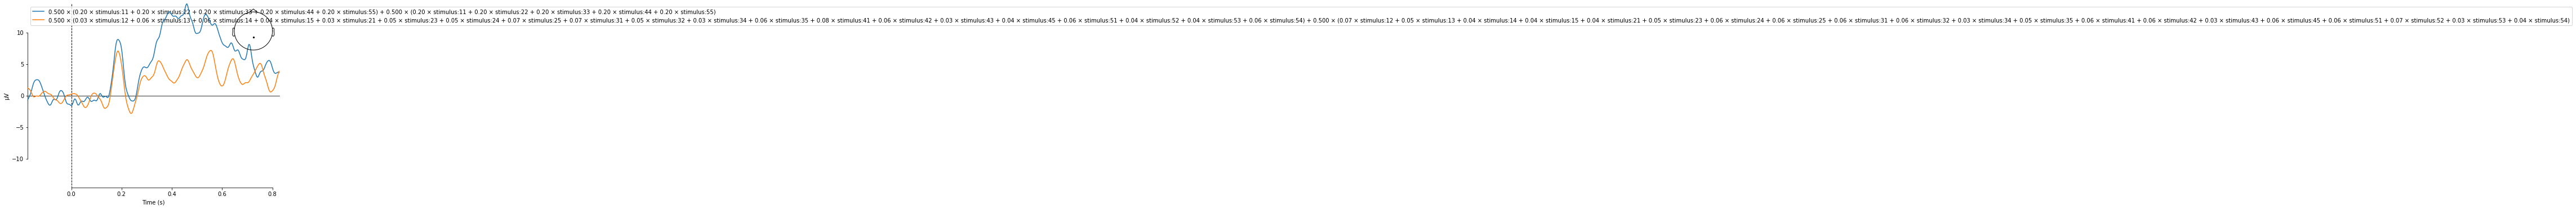

Identifying common channels ...
Identifying common channels ...
The peak of the rare condition is at ('Pz', 0.45959375, 1.4542737727574178e-05)s.
The peak of the frequent condition is at ('Pz', 0.55334375, 7.152851864538009e-06)s.


In [24]:
# compare evoked to the literature
mne.viz.plot_compare_evokeds([evoked_target_combined, evoked_distractor_combined])

evoked_target_grand_avg = mne.grand_average(evoked_target_dump)
evoked_distractor_grand_avg = mne.grand_average(evoked_distractor_dump)

print(f"The peak of the rare condition is at {evoked_target_grand_avg.get_peak(return_amplitude=True)}s.")
print(f"The peak of the frequent condition is at {evoked_distractor_grand_avg.get_peak(return_amplitude=True)}s.")

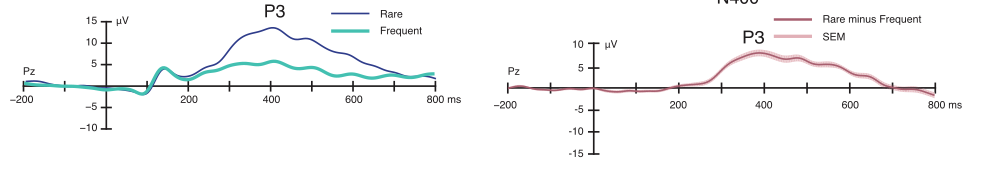

In [29]:
# get the difference waveform and compare this to the results published
evoked_difference_grand_avg = mne.combine_evoked([evoked_target_grand_avg, evoked_distractor_grand_avg], weights=[1, -1])

mean_amp = evoked_difference_grand_avg.data.mean(axis=1)
print(f"the mean amplitude {mean_amp[0] *10e6}")

_, peak_lat, peak_amp = evoked_difference_grand_avg.get_peak(return_amplitude=True)
print(f"the peak amplitude {peak_amp *10e6}")
print(f"the peak latency {peak_lat *10e3}")

the mean amplitude 29.61616723102368
the peak amplitude 107.45876990725397
the peak latency 3931.8750000000005


The documented ERP difference waveform (standard deviation in parentheses), averaged across all participants, reported by Kappenman et al. (2021) is reported to be the following:
- mean amplitude ($\mu V$): $6.29 (3.39)$
- peak amplitude ($\mu V$): $10.15 (4.53)$
- peak latency (ms): $408.89 (70.48)$
- onset latency (ms): $327.44 (61.98)$

Across participants:

![difference_waveforms_across_participants](img/difference_waveforms_tab3_suppl.png)

### reaction time

In [32]:
np.mean(evoked_metadata['mean_response_time']) *10e3

5113.672897847675

Mean reaction time and accuracy for each trial type:
- rare (ms): $424.57 (67.67)$ with $89.81 \% (7.94)$
- frequent (ms): $378.08 (66.03)$ with $98.90 \% (1.51)$

## save the results

As I am now confident in my results, I write them to the results folder to ease the next steps and for reproduceability.

In [ ]:
filepath_target_grand_avg = f"{configuration.path_results}_target_grandavg_evoked-ave.fif"
filepath_distractor_grand_avg = f"{configuration.path_results}_distractor_grandavg_evoked-ave.fif"
mne.write_evokeds(evoked_target_grand_avg, target_ch)
mne.write_evokeds(evoked_distractor_grand_avg, distractor_ch)

filepath_metadata = f"{configuration.path_results}_evoked_metadata.csv"
evoked_metadata.to_csv(filepath_metadata)

## statistics

In [ ]:
# permutation t-test
# data: (n_samples, n_tests)

T0, p_values, H0 = mne.stats.permutation_t_test(data, configuration.n_permutations, n_jobs = 1)
significant_sensors = picks[p_values <= 0.05]

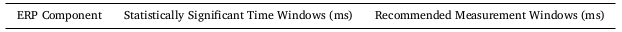